# Project Steps

## 1. Exploratory Data Analysis (EDA)

## 2. LDA Projection

### 2.1. Compute Mu and Within-Class Scatter Matrix (SW)

SW = S0 + S1 + S2 + S3 + S4
S0-S4 = Σ(Xi - μi)(Xi - μi)^T

### 2.2. Compute Between-Class Scatter Matrix (SB)

m = 1/k * Σ(k) = 1/5 * Σ(μi)
SB = Σ(Ni (μi - m)(μi - m)^T)

### 2.3. Find LDA Projection Vectors
### 2.3.1 Create a function that ouputs the LDA projections

S⁻¹W SB = V D V^T
### 2.4. Apply LDA from sklearn

### 2.5. Compare the reuslts
### 2.5.1. Compare the accuracy of both LDA sk vs LDA from sratch

### 2.6. Implement PCA with 2 components and compare the result
### 2.6.1. Compare the result PCA vs LDA


## 3. Implement Naive Bayes

### 3.1. Get Simple Probabilities
### 3.2. Calculate the P(X|Y) - the likelihood of observing X given each class by using histograms 
### 3.3. Train Naive Bayes
### 3.4. Test its accuracy 

## 4. Implement feature reduction on the whole dataset

## 5. Feed 3 other models with the reduced features 
### 5.1. kNN
### 5.2. Decison Trees/ or LDA /or QDA
### 5.3. Neural Networks 



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import sklearn.discriminant_analysis as da
from sklearn.decomposition import PCA
from pylab import *
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


## Step 1 : Explore the data , EDA

In [2]:
# Specifying the path to your .npy file
train_file_path = 'fashion_train.npy'
test_file_path = 'fashion_test.npy'

# Load the data from the .npy file
train_data = np.load(train_file_path)
test_data = np.load(test_file_path)
print(train_data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


### Plot their means

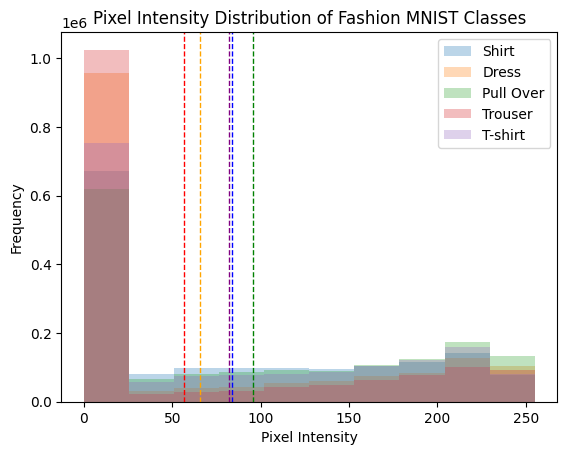

In [3]:
#get list of
t_shirt_list = []
trouser_list = []
pull_over_list = []
dress_list = []
shirt_list = []

#create subset of data with the different classes
for i in range(len(train_data)):
    if train_data[i][-1] == 0:
        t_shirt_list.append(train_data[i])
    elif train_data[i][-1] == 1:
        trouser_list.append(train_data[i])
    elif train_data[i][-1] == 2:
        pull_over_list.append(train_data[i])
    elif train_data[i][-1] == 3:
        dress_list.append(train_data[i])
    elif train_data[i][-1] == 4:
        shirt_list.append(train_data[i])

mu0_tshirts = np.mean(t_shirt_list)
mu1_trousers = np.mean(trouser_list)
mu2_pull_over = np.mean(pull_over_list)
mu3_dress = np.mean(dress_list)
mu4_shirt = np.mean(shirt_list)
concatenated_tshirt = np.concatenate(t_shirt_list)
concatenated_trouser = np.concatenate(trouser_list)
concatenated_pull_over = np.concatenate(pull_over_list)
concatenated_dress = np.concatenate(dress_list)
concatenated_shirt = np.concatenate(shirt_list)

#plot all the histograms on top of eachother
#plt.hist(concatenated_shirt)
#plt.hist(concatenated_dress)
#plt.hist(concatenated_pull_over)
#plt.hist(concatenated_trouser)
#plt.hist(concatenated_tshirt)
#add transparency
plt.hist(concatenated_shirt, alpha = 0.3)
plt.hist(concatenated_dress, alpha = 0.3)
plt.hist(concatenated_pull_over, alpha = 0.3)
plt.hist(concatenated_trouser, alpha = 0.3)
plt.hist(concatenated_tshirt, alpha = 0.3)
plt.legend(['Shirt', 'Dress', 'Pull Over', 'Trouser', 'T-shirt'])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution of Fashion MNIST Classes')
#add mu lines
plt.axvline(mu0_tshirts, color='purple', linestyle='dashed', linewidth=1)
plt.axvline(mu1_trousers, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mu2_pull_over, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mu3_dress, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mu4_shirt, color='blue', linestyle='dashed', linewidth=1)

## Step 2: LDA

## 2.1. Compute Mu and Within-Class Scatter Matrix (SW)

SW = S0 + S1 + S2 + S3 + S4
S0-S4 = Σ(Xi - μi)(Xi - μi)^T

In [4]:
# Get the data withouth the lables and only get the lables
x = train_data[:, :-1]
y = train_data[:, -1]

In [5]:
# Get the classes 

class_tshirt = train_data[train_data[:,-1]==0]
class_tshirt = class_tshirt[:,:-1]


class_trouser = train_data[train_data[:,-1]==1]
class_trouser = class_trouser[:,:-1]

class_pullover = train_data[train_data[:,-1]==2]
class_pullover = class_pullover[:,:-1]

class_dress = train_data[train_data[:,-1]==3]
class_dress = class_dress[:,:-1]


class_shirt = train_data[train_data[:,-1]==4]
class_shirt = class_shirt[:,:-1]

In [6]:
# Calculate the mean of each class
mean_tshirt = np.mean(class_tshirt,axis = 0)
mean_trouser = np.mean(class_trouser,axis = 0)
mean_pullover = np.mean(class_pullover,axis = 0)
mean_dress = np.mean(class_dress,axis = 0)
mean_shirt = np.mean(class_shirt,axis =0)


In [7]:
# Get the scatter matrix for each class (S_0, S_1, S_2, S_3, S_4)
scatter_tshirt = np.cov(class_tshirt.T)
scatter_trouser = np.cov(class_trouser.T)
scatter_pullover = np.cov(class_pullover.T)
scatter_dress = np.cov(class_dress.T)
scatter_shirt = np.cov(class_shirt.T)


In [8]:
# Calculating S_w -> scatter matrix
S_w = scatter_tshirt + scatter_trouser + scatter_pullover + scatter_dress + scatter_shirt


## 2.1 Get the betweeness scatter matrix Sb
m = 1/k * Σ(k) = 1/5 * Σ(μi)
SB = Σ(Ni (μi - m)(μi - m)^T)

In [9]:
# Get m (global mean)
m = 1/5*(mean_tshirt+mean_trouser+mean_pullover+mean_dress+mean_shirt)
print(f" This is m {m}")

 This is m [2.58163397e-03 8.81689118e-03 6.40425516e-02 1.77386313e-01
 3.68941746e-01 6.98729482e-01 1.43336557e+00 4.06888693e+00
 1.07999436e+01 2.77319248e+01 6.23577691e+01 7.96894379e+01
 8.01430878e+01 7.14300200e+01 6.84331625e+01 7.72228891e+01
 8.21231713e+01 7.29360385e+01 4.85968703e+01 1.79965899e+01
 6.15582265e+00 2.15656199e+00 8.82495587e-01 4.74015181e-01
 1.84437533e-01 7.79096991e-02 1.06900110e-02 2.97606919e-03
 5.64148659e-03 1.81667815e-02 1.25370942e-01 4.74341973e-01
 9.75567862e-01 3.50390610e+00 1.35876280e+01 3.35442852e+01
 6.02471719e+01 9.57131255e+01 1.37637977e+02 1.60808222e+02
 1.76134855e+02 1.71021429e+02 1.67745474e+02 1.75002934e+02
 1.70553550e+02 1.46140994e+02 1.23281175e+02 7.87504344e+01
 4.44948901e+01 2.08064587e+01 6.44475660e+00 1.79982964e+00
 6.46990296e-01 2.54145436e-01 6.65820549e-02 2.25595090e-02
 1.36772453e-02 5.04304599e-02 2.07934429e-01 7.43246077e-01
 3.26058337e+00 1.68992432e+01 4.34221358e+01 6.47060835e+01
 8.62982401e+

In [10]:
# betweeness_scatter
S_b= (
len(class_tshirt)*np.outer((mean_tshirt-m),(mean_tshirt-m).T) + 
len(class_trouser)*np.outer((mean_trouser-m),(mean_trouser-m).T)+
len(class_pullover)*np.outer((mean_pullover-m),(mean_pullover-m).T)+ 
len(class_dress)*np.outer((mean_dress-m),(mean_dress-m).T) + 
len(class_shirt)*np.outer((mean_shirt-m),(mean_shirt-m).T)
)

In [11]:
# find M, which is the discriminant matrix  M= S_w(inverse) * S_b
S_W_inv = np.linalg.inv(S_w)
discr_matrix = np.dot(S_W_inv , S_b)



### 2.3. Find LDA Projection Vectors

In [12]:
# Get the eigen values and eigen vectors of the discriminant matrix  M
eigen_values, eigen_vectors = np.linalg.eig(discr_matrix)
eigen_vectors[0,]


array([ 0.51675665+0.j        , -0.43367762+0.j        ,
        0.45864885+0.j        , -0.32527175+0.j        ,
       -0.73870458+0.j        ,  0.29624178+0.j        ,
        0.31622715-0.00924813j,  0.31622715+0.00924813j,
       -0.23407389+0.j        ,  0.82266526+0.j        ,
       -0.21867495+0.j        , -0.63095557+0.j        ,
       -0.63095557-0.j        , -0.0591029 -0.46690203j,
       -0.0591029 +0.46690203j, -0.7550849 +0.j        ,
       -0.7550849 -0.j        , -0.07987935+0.59460275j,
       -0.07987935-0.59460275j, -0.17109309+0.32453855j,
       -0.17109309-0.32453855j, -0.27151236-0.35252438j,
       -0.27151236+0.35252438j,  0.20946428-0.0773118j ,
        0.20946428+0.0773118j , -0.44720298+0.10966972j,
       -0.44720298-0.10966972j,  0.11229905+0.j        ,
       -0.2080066 +0.j        ,  0.47705109+0.16985028j,
        0.47705109-0.16985028j, -0.87338563+0.j        ,
       -0.87338563-0.j        ,  0.89213475+0.j        ,
       -0.83711623+0.j        ,

In [13]:
# Another way of finding the eigen values by sk learn 
sc.linalg.eigh(S_b,S_w)

(array([-3.44581581e-10, -2.87334048e-10, -2.75001521e-10, -2.34280726e-10,
        -2.06955379e-10, -2.04907087e-10, -2.03061302e-10, -1.82381845e-10,
        -1.71419216e-10, -1.50020605e-10, -1.48577747e-10, -1.42948254e-10,
        -1.42529330e-10, -1.27850790e-10, -1.27253905e-10, -1.25194689e-10,
        -1.16052673e-10, -1.14230590e-10, -1.10803209e-10, -1.05557385e-10,
        -1.03779420e-10, -1.02839160e-10, -9.67479539e-11, -9.25874069e-11,
        -9.22570047e-11, -9.04583514e-11, -8.64346850e-11, -8.43117521e-11,
        -8.41878479e-11, -8.25493931e-11, -8.01382756e-11, -7.77022877e-11,
        -7.62139512e-11, -7.57951539e-11, -7.18092549e-11, -7.10607160e-11,
        -7.02602502e-11, -6.85403489e-11, -6.67369228e-11, -6.60999279e-11,
        -6.55819304e-11, -6.02991820e-11, -5.98302989e-11, -5.92817492e-11,
        -5.91328703e-11, -5.71313801e-11, -5.64324400e-11, -5.60453982e-11,
        -5.32215519e-11, -5.24077152e-11, -5.08664781e-11, -5.07857203e-11,
        -4.9

In [14]:


#eigen_values, eigen_vectors = np.linalg.eig(discr_matrix)
eigen_values, eigen_vectors =sc.linalg.eigh(S_b,S_w)

# Create pairs of eigenvalues and eigenvectors
eigen_pairs = [(eigen_values[i], eigen_vectors[:, i]) for i in range(len(eigen_values))]

# Sort the eigenvalue-eigenvector pairs based on eigenvalues
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Extract the top 2 eigenvalues and corresponding eigenvectors
top_eigenvalues = [eigen_pairs[i][0] for i in range(2)]
top_eigenvectors = [eigen_pairs[i][1] for i in range(2)]

# Convert the lists to numpy arrays if needed
top_eigenvalues = np.array(top_eigenvalues)
top_eigenvectors = np.array(top_eigenvectors)

# Now top_eigenvalues and top_eigenvectors contain the top 2 eigenvalues and corresponding eigenvectors
print(top_eigenvectors.shape)
eigen_values_sum = sum(eigen_values)
for i,j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format(i+1,(j[0]/eigen_values_sum).real))
    #from this we can see that we want the first 4 features
W = np.hstack((eigen_pairs[0][1].reshape(784,1),eigen_pairs[1][1].reshape(784,1)))
print('Matrix W:\n', W.real)
print(W.shape)
print(np.real(top_eigenvectors).T)
print(np.real(top_eigenvectors).T.shape)

(2, 784)
Eigenvalue 1:  60.75%
Eigenvalue 2:  20.39%
Eigenvalue 3:  13.28%
Eigenvalue 4:  5.58%
Eigenvalue 5:  0.00%
Eigenvalue 6:  0.00%
Eigenvalue 7:  0.00%
Eigenvalue 8:  0.00%
Eigenvalue 9:  0.00%
Eigenvalue 10:  0.00%
Eigenvalue 11:  0.00%
Eigenvalue 12:  0.00%
Eigenvalue 13:  0.00%
Eigenvalue 14:  0.00%
Eigenvalue 15:  0.00%
Eigenvalue 16:  0.00%
Eigenvalue 17:  0.00%
Eigenvalue 18:  0.00%
Eigenvalue 19:  0.00%
Eigenvalue 20:  0.00%
Eigenvalue 21:  0.00%
Eigenvalue 22:  0.00%
Eigenvalue 23:  0.00%
Eigenvalue 24:  0.00%
Eigenvalue 25:  0.00%
Eigenvalue 26:  0.00%
Eigenvalue 27:  0.00%
Eigenvalue 28:  0.00%
Eigenvalue 29:  0.00%
Eigenvalue 30:  0.00%
Eigenvalue 31:  0.00%
Eigenvalue 32:  0.00%
Eigenvalue 33:  0.00%
Eigenvalue 34:  0.00%
Eigenvalue 35:  0.00%
Eigenvalue 36:  0.00%
Eigenvalue 37:  0.00%
Eigenvalue 38:  0.00%
Eigenvalue 39:  0.00%
Eigenvalue 40:  0.00%
Eigenvalue 41:  0.00%
Eigenvalue 42:  0.00%
Eigenvalue 43:  0.00%
Eigenvalue 44:  0.00%
Eigenvalue 45:  0.00%
Eigenva

In [15]:
# Transoforming the eigenvectoræs to real numbers
top_eigenvectors_real_nb = np.real(top_eigenvectors)
print(top_eigenvectors_real_nb.shape)
x1 =top_eigenvectors_real_nb[0]
x2 = top_eigenvectors_real_nb[1]
print(x1.shape)
print(x2.shape)



(2, 784)
(784,)
(784,)


### Create  a function that applyies LDA to a dataset

In [16]:
def apply_lda_to_each_img_in_array(img_array):
    lda_data = [] #create an empty array to store the lda data
    for row in img_array: #for each row in the array
        img_data = row[:-1] #get the img data
        img_label = row[-1] #get the img label

        imgx1 = np.dot(img_data,x1) #apply lda to the img
        imgx2 = np.dot(img_data,x2) #apply lda to the img
        lda_data.append([imgx1,imgx2,img_label]) #append the img data and label to the lda_data array
    lda_data = np.array(lda_data) #convert the array to a numpy array
    return lda_data

### 2.4. Apply LDA from sklearn

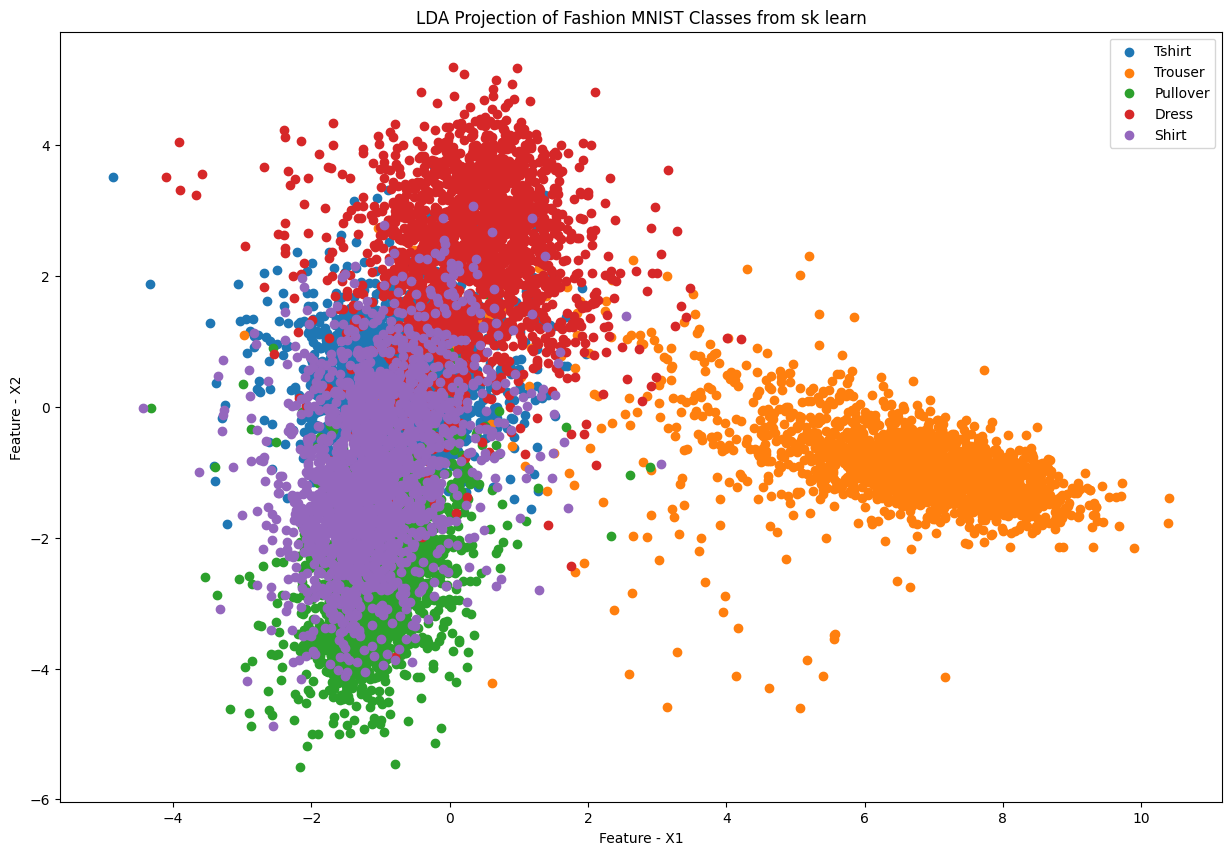

In [17]:
# Add LDA from a library and compare the reuslts

tm = top_eigenvectors_real_nb
new = np.dot(tm,x.T)
final_lda = new.T

lda = da.LinearDiscriminantAnalysis(n_components=2,solver='eigen')
b = lda.fit(x,y)
lda_sklearn_projection = lda.transform(x)

#print(new.T)
#print(lda_sklearn_projection)

are_results_similar = np.allclose(new.T,lda_sklearn_projection)
#print("Are results similar?",are_results_similar)

X_r2 = lda.fit(x, y).transform(x)
plt.figure(figsize=(15,10))
#plt.scatter(X_r2[:,0],X_r2[:,1],c=y)

# Scatter plot for class 0
plt.scatter(X_r2[y == 0, 0], X_r2[y == 0, 1], label='Tshirt')

# Scatter plot for class 1
plt.scatter(X_r2[y == 1, 0], X_r2[y == 1, 1], label='Trouser')
# Scatter plot for class 2
plt.scatter(X_r2[y == 2, 0], X_r2[y == 2, 1], label='Pullover')

# Scatter plot for class 3
plt.scatter(X_r2[y == 3, 0], X_r2[y == 3, 1], label='Dress')
# Scatter plot for class 4
plt.scatter(X_r2[y == 4, 0], X_r2[y == 4, 1], label='Shirt')
plt.legend()
plt.title('LDA Projection of Fashion MNIST Classes from sk learn')
plt.xlabel('Feature - X1')
plt.ylabel('Feature - X2')
plt.show()

### 2.5. Compare the reuslts LDA from scratch vs LDA sk learn

Text(0.5, 1.0, 'LDA Projection of Fashion MNIST Classes from scratch')

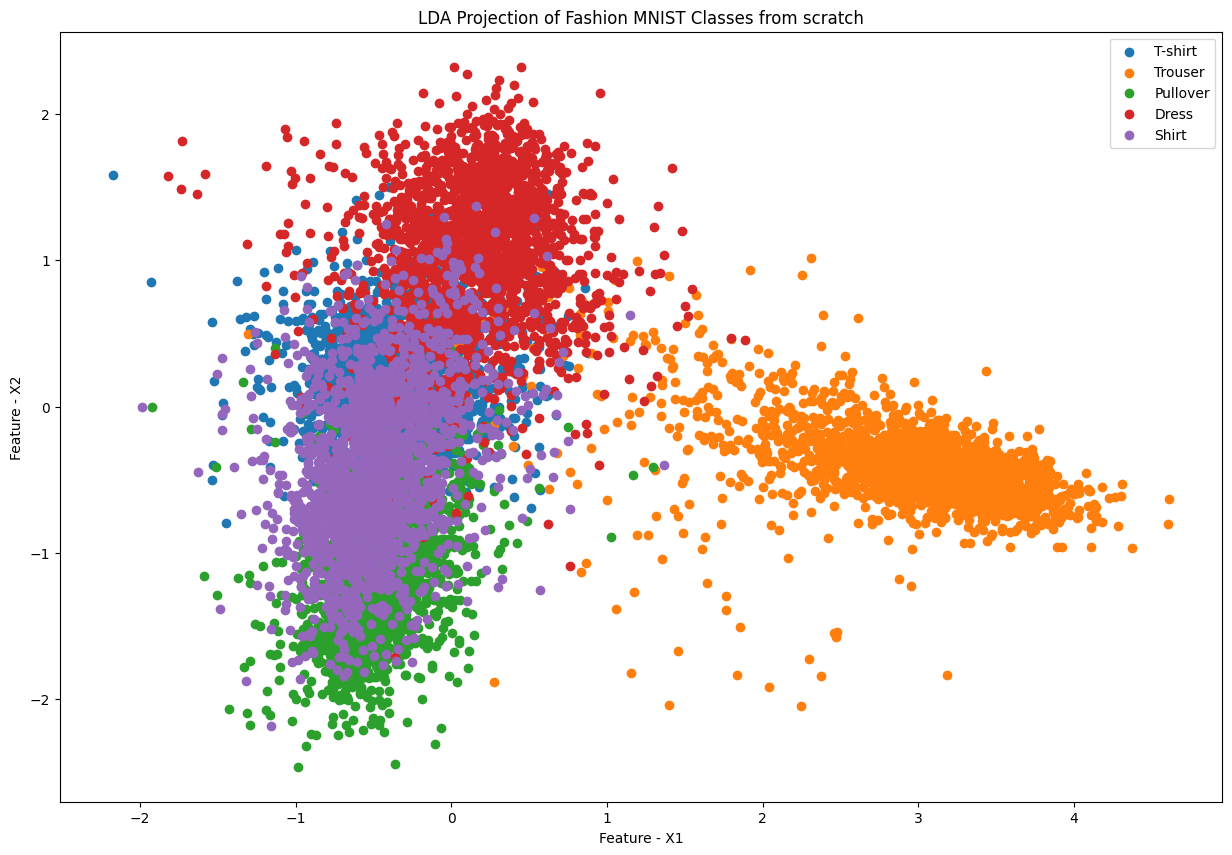

In [18]:
#Do scatter plot for each class to seee how LDA works

plt.figure(figsize=(15, 10))
tshirt_proj_x1 = np.dot(class_tshirt,x1)
tshirt_proj_x2 = np.dot(class_tshirt,x2)

plt.scatter(tshirt_proj_x1,tshirt_proj_x2, label = 'T-shirt')


trouser_proj_x1 = np.dot(class_trouser,x1)
trouser_proj_x2 = np.dot(class_trouser,x2)

plt.scatter(trouser_proj_x1,trouser_proj_x2, label = 'Trouser')


pullover_proj_x1 = np.dot(class_pullover,x1)
pullover_proj_x2 = np.dot(class_pullover,x2)

plt.scatter(pullover_proj_x1,pullover_proj_x2, label = 'Pullover')


dress_proj_x1 = np.dot(class_dress,x1)
dress_proj_x2 = np.dot(class_dress,x2)

plt.scatter(dress_proj_x1,dress_proj_x2, label = 'Dress')


shirts_proj_x1 = np.dot(class_shirt,x1)
shirts_proj_x2 = np.dot(class_shirt,x2)

plt.scatter(shirts_proj_x1,shirts_proj_x2, label = 'Shirt')
plt.xlabel('Feature - X1')
plt.ylabel('Feature - X2')
plt.legend()
plt.title('LDA Projection of Fashion MNIST Classes from scratch')

### 2.5.1 Compare  the accuracies of both LDA from scratch and LDA from sk learn 

In [19]:
## TODO

### 2.6. Implement PCA with 2 components 

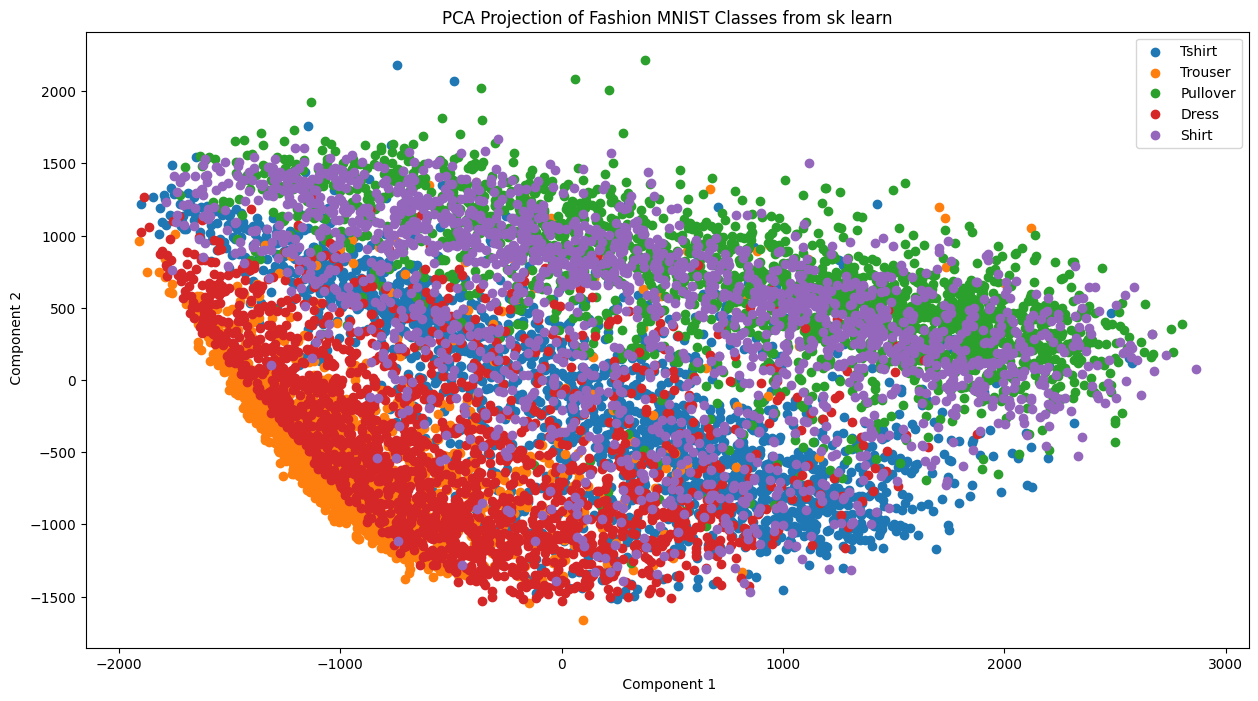

In [20]:
# ADD pca and see which one does a better job maybe


pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

plt.figure(figsize=(15,8))
#plt.scatter(X_r2[:,0],X_r2[:,1],c=y)

# Scatter plot for class 0
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Tshirt')

# Scatter plot for class 1
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Trouser')
# Scatter plot for class 2
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], label='Pullover')
plt.title('PCA Projection of Fashion MNIST Classes from sk learn')
# Scatter plot for class 3
plt.scatter(X_pca[y == 3, 0], X_pca[y == 3, 1], label='Dress')
# Scatter plot for class 4
plt.scatter(X_pca[y == 4, 0], X_pca[y == 4, 1], label='Shirt')
plt.xlabel(' Component 1')
plt.ylabel(' Component 2')
plt.legend()
plt.show()

### 2.6.1. Ccompare the result PCA vs LDA

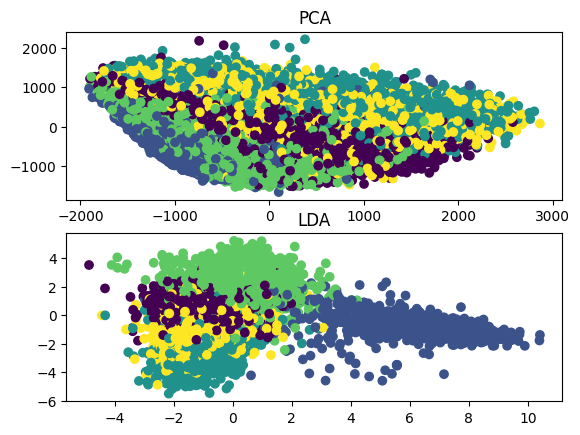

In [21]:

# subploting and title setting
subplot(2,1,1)
title("PCA")
# plotting the pca
plt.scatter(X_pca[:,0],X_pca[:,1], c=y)
# subploting and title
subplot(2,1,2)
title("LDA")
# plotting LDA
plt.scatter(X_r2[:,0],X_r2[:,1], c=y)
plt.show()

# Step 3: Implementing Naive Bayes
### 3.1 Getting the simple probabilities



In [22]:
count_0_tshirt = 0
count_1_trousers = 0
count_2_pull_over = 0
count_3_dress = 0
count_4_shirt = 0
num_rows = 10000



#Loop through the last column
for value in y:
    if value == 0:
        count_0_tshirt += 1
    elif value == 1:
        count_1_trousers += 1
    elif value == 2:
        count_2_pull_over += 1
    elif value == 3:
        count_3_dress += 1
    elif value == 4:
        count_4_shirt += 1

#Get the simple probabilities
P_tshirt = count_0_tshirt / num_rows
P_trouser = count_1_trousers / num_rows
P_pull_over = count_2_pull_over/ num_rows
P_dress = count_3_dress / num_rows
P_shirt = count_4_shirt / num_rows

print(f" P(T-shirt) = {P_tshirt}")
print(f" P(Trousers) = {P_trouser}")
print(f" P(Pull Over) = {P_pull_over}")
print(f" P(Dress) = {P_dress}")
print(f" P(Shirt) = {P_shirt}")

simpprob = {"T_shirt":P_tshirt,"Trouser":P_trouser,"Pull_over":P_pull_over,"Dress":P_dress,"Shirt":P_shirt}

 P(T-shirt) = 0.2033
 P(Trousers) = 0.1947
 P(Pull Over) = 0.2001
 P(Dress) = 0.2005
 P(Shirt) = 0.2014


### 3.2. Calculate the P(X|Y) - the likelihood of observing X given each class by using histograms 

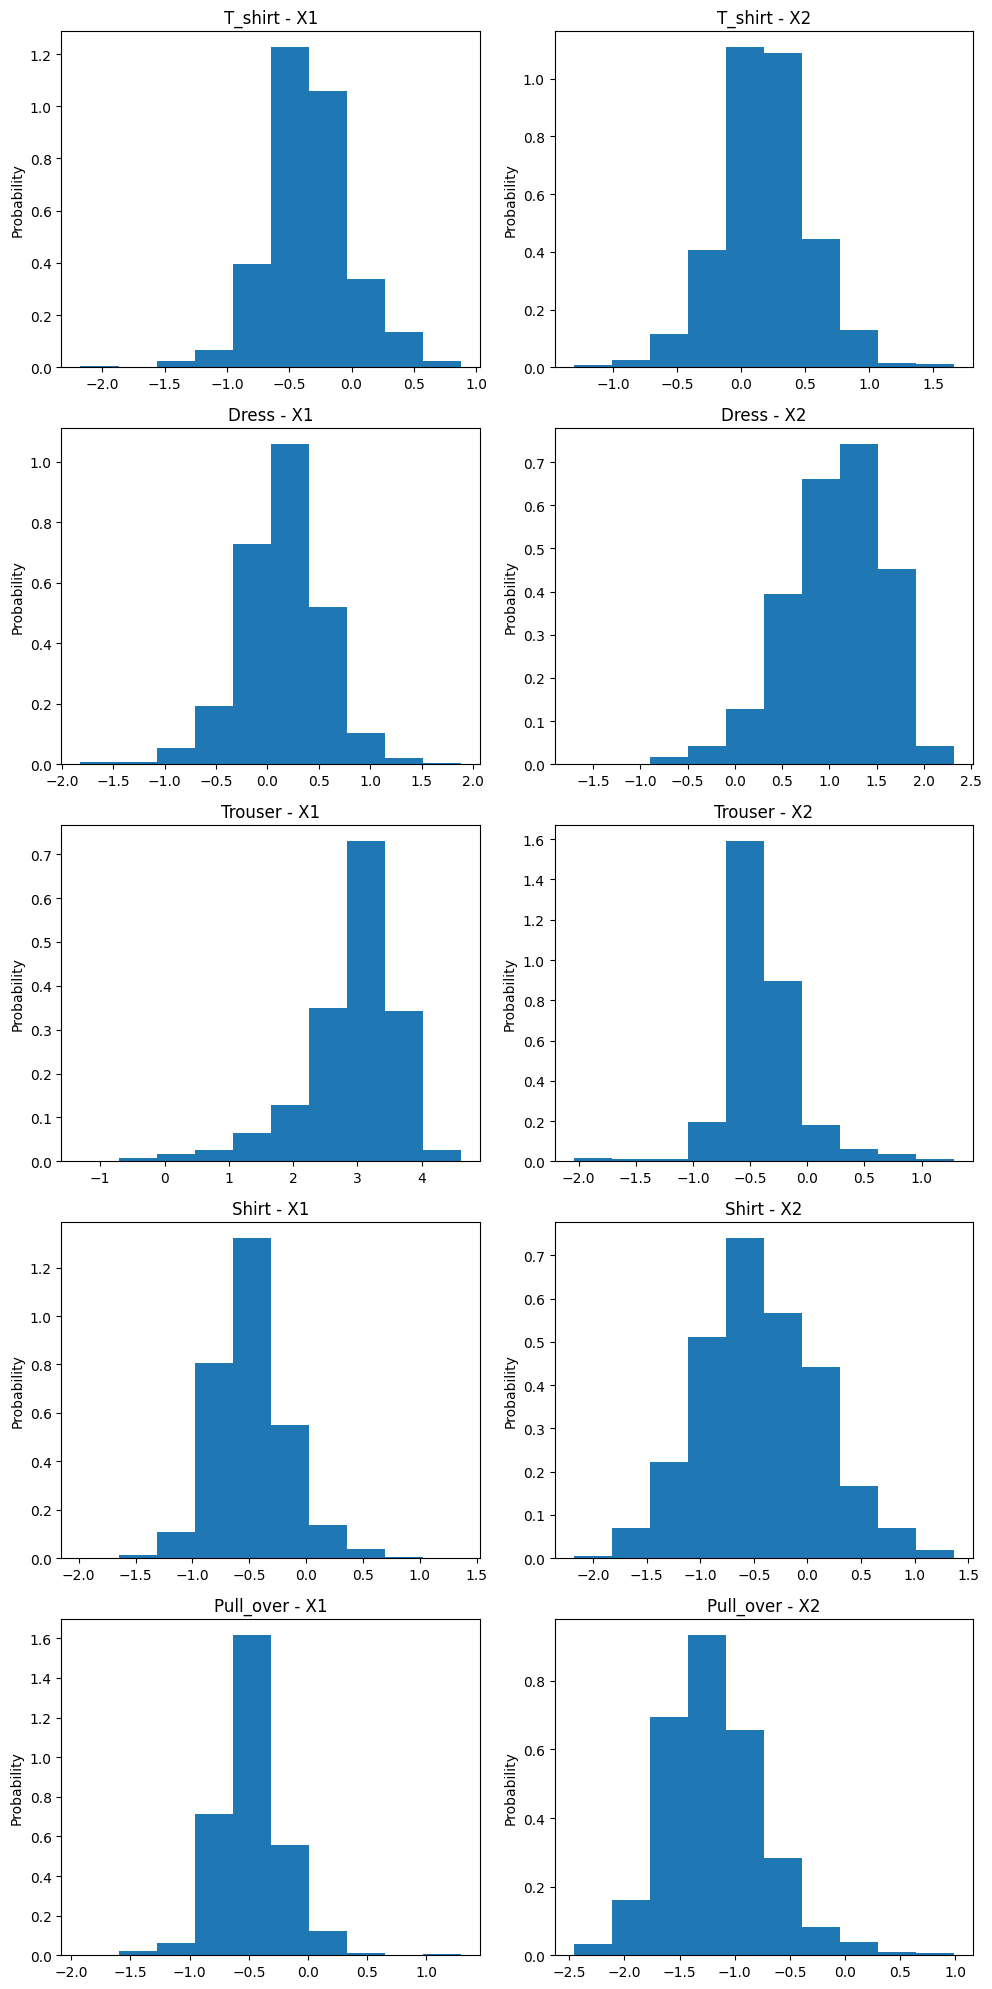

In [23]:
def show_histograms():
    categories = ['T_shirt', 'Dress', 'Trouser', 'Shirt', 'Pull_over']
    x1_data = [tshirt_proj_x1, dress_proj_x1, trouser_proj_x1, shirts_proj_x1, pullover_proj_x1]
    x2_data = [tshirt_proj_x2, dress_proj_x2, trouser_proj_x2, shirts_proj_x2, pullover_proj_x2]
    fig, axs = plt.subplots(5, 2, figsize=(10, 20))

    for i in range(5):
        axs[i, 0].hist(x1_data[i], density=1)
        axs[i, 0].set_title(f'{categories[i]} - X1')
        axs[i, 0].set_ylabel('Probability')
        axs[i, 1].hist(x2_data[i], density=1)
        axs[i, 1].set_title(f'{categories[i]} - X2')
        axs[i, 1].set_ylabel('Probability')
    plt.tight_layout()
    #plt.show()

show_histograms()


### 3.3. Train Naive Bayes
$$\ P(C_i | X_1, X_2) = \frac{P(C_i) \cdot P(X_1 | C_i) \cdot P(X_2 | C_i)}{P(X_1) \cdot P(X_2)} \$$

Where:
- \( C_i \) represents one of the 5 classes.
- \( X_1 \) and \( X_2 \) are ower features.
- \( P(C_i | X_1, X_2) \) is the posterior probability of class \( C_i \) given the features.
- \( P(C_i) \) is the prior probability of class \( C_i \).
- \( P(X_1 | C_i) \) is the likelihood of \( X_1 \) given class \( C_i \).
- \( P(X_2 | C_i) \) is the likelihood of \( X_2 \) given class \( C_i \).
- \( P(X_1) \) and \( P(X_2) \) are the marginal probabilities of \( X_1 \) and \( X_2 \), respectively.


In [24]:
def apply_naive_bayes(feature1, feature2):
    categories = ['T_shirt', 'Dress', 'Trouser', 'Shirt', 'Pull_over']
    x1_data = [tshirt_proj_x1, dress_proj_x1, trouser_proj_x1, shirts_proj_x1, pullover_proj_x1]
    x2_data = [tshirt_proj_x2, dress_proj_x2, trouser_proj_x2, shirts_proj_x2, pullover_proj_x2]
    results = {}

    for i in range(5):
        k,bins = np.histogram(x1_data[i], density=True)
        bin_index = np.digitize(feature1,bins)

        if 0<bin_index<len(bins):
            binprob1 = k[bin_index-1]
        else:
            binprob1 = 0

        k,bins = np.histogram(x2_data[i], density=True)
        bin_index = np.digitize(feature2,bins)

        if 0<bin_index<len(bins):
            binprob2 = k[bin_index-1]
        else:
            binprob2 = 0

        #print(f'probability x1: {binprob1} and probability x2: {binprob2}')

        class_simp_prob = simpprob[categories[i]]
        #print(f'probability of {categories[i]}: {class_simp_prob}')

        probabilitet = binprob1*binprob2*class_simp_prob
        #print(probabilitet)

        results[categories[i]] = probabilitet

    #print(results)
    max_key = max(results, key=results.get)
    max_value = results[max_key]
    #plt.tight_layout()
    #plt.show()
    return max_key, max_value






### 3.4. Test the accuracy of Naive Bayes

In [25]:
def get_accuracy_of_naive_bayes(lda_data_with_label):
    class_dict = {"T_shirt":0,"Trouser":1,"Pull_over":2,"Dress":3,"Shirt":4}
    correct = 0
    for row in lda_data_with_label:
        feature1 = row[0]
        feature2 = row[1]
        actual_class = row[2]

        predicted_class = apply_naive_bayes(feature1,feature2)[0]
        if class_dict[predicted_class] == actual_class:
            correct += 1
    accuracy = (correct/len(lda_data_with_label))
    return accuracy



### 3.4. Test Naive Bayes' accuracy

In [26]:
test_data_with_lda = apply_lda_to_each_img_in_array(test_data)
naivebayes_accuracy = get_accuracy_of_naive_bayes(test_data_with_lda)

print(f'accuracy: {naivebayes_accuracy*100}%, {naivebayes_accuracy*len(test_data_with_lda)} out of {len(test_data_with_lda)} correct')

accuracy: 72.1%, 3605.0 out of 5000 correct


In [27]:
#test1 = test_data[0:,:-1][31]
print(tshirt_proj_x1)
#plt.imshow(x1.reshape(28,28), cmap = 'gray')
#testlabel = test_data[:,-1][31]
#print(f'category: {testlabel}')

[-0.81275654 -0.54055627  0.27186573 ... -0.96909163 -0.38646735
 -0.30549757]


In [28]:
"""
def apply_lda_to_img(img_array):
    imgx1 = np.dot(img_array,x1)
    imgx2 = np.dot(img_array,x2)
    return imgx1, imgx2

ldatest1x1 = np.dot(test1,x1)
ldatest1x2 = np.dot(test1,x2)
print(ldatest1x1)
print(ldatest1x2)

tshirt_proj_x1 = np.dot(class_tshirt,x1)
tshirt_proj_x2 = np.dot(class_tshirt,x2)

plt.scatter(tshirt_proj_x1,tshirt_proj_x2)

trouser_proj_x1 = np.dot(class_trouser,x1)
trouser_proj_x2 = np.dot(class_trouser,x2)


plt.scatter(tshirt_proj_x1,tshirt_proj_x2,alpha=0.1)
plt.scatter(trouser_proj_x1,trouser_proj_x2,alpha=0.05)

pullover_proj_x1 = np.dot(class_pullover,x1)
pullover_proj_x2 = np.dot(class_pullover,x2)

plt.scatter(pullover_proj_x1,pullover_proj_x2)

dress_proj_x1 = np.dot(class_dress,x1)
dress_proj_x2 = np.dot(class_dress,x2)

plt.scatter(dress_proj_x1,dress_proj_x2)

shirts_proj_x1 = np.dot(class_shirt,x1)
shirts_proj_x2 = np.dot(class_shirt,x2)

plt.scatter(shirts_proj_x1,shirts_proj_x2)
plt.scatter(ldatest1x1,ldatest1x2, color = 'black')
"""


"\ndef apply_lda_to_img(img_array):\n    imgx1 = np.dot(img_array,x1)\n    imgx2 = np.dot(img_array,x2)\n    return imgx1, imgx2\n\nldatest1x1 = np.dot(test1,x1)\nldatest1x2 = np.dot(test1,x2)\nprint(ldatest1x1)\nprint(ldatest1x2)\n\ntshirt_proj_x1 = np.dot(class_tshirt,x1)\ntshirt_proj_x2 = np.dot(class_tshirt,x2)\n\nplt.scatter(tshirt_proj_x1,tshirt_proj_x2)\n\ntrouser_proj_x1 = np.dot(class_trouser,x1)\ntrouser_proj_x2 = np.dot(class_trouser,x2)\n\n\nplt.scatter(tshirt_proj_x1,tshirt_proj_x2,alpha=0.1)\nplt.scatter(trouser_proj_x1,trouser_proj_x2,alpha=0.05)\n\npullover_proj_x1 = np.dot(class_pullover,x1)\npullover_proj_x2 = np.dot(class_pullover,x2)\n\nplt.scatter(pullover_proj_x1,pullover_proj_x2)\n\ndress_proj_x1 = np.dot(class_dress,x1)\ndress_proj_x2 = np.dot(class_dress,x2)\n\nplt.scatter(dress_proj_x1,dress_proj_x2)\n\nshirts_proj_x1 = np.dot(class_shirt,x1)\nshirts_proj_x2 = np.dot(class_shirt,x2)\n\nplt.scatter(shirts_proj_x1,shirts_proj_x2)\nplt.scatter(ldatest1x1,ldatest1

## 4. Implement feature reduction on the whole dataset



In [29]:
# Get the data withouth the lables and only get the lables
x_train_data = train_data[:, :-1]
y_train_data = train_data[:, -1]

x_test_data = test_data[:, :-1]
y_test_data = test_data[:, -1]

### 4.1. Get explained variance and cumulative explained variance for PCA

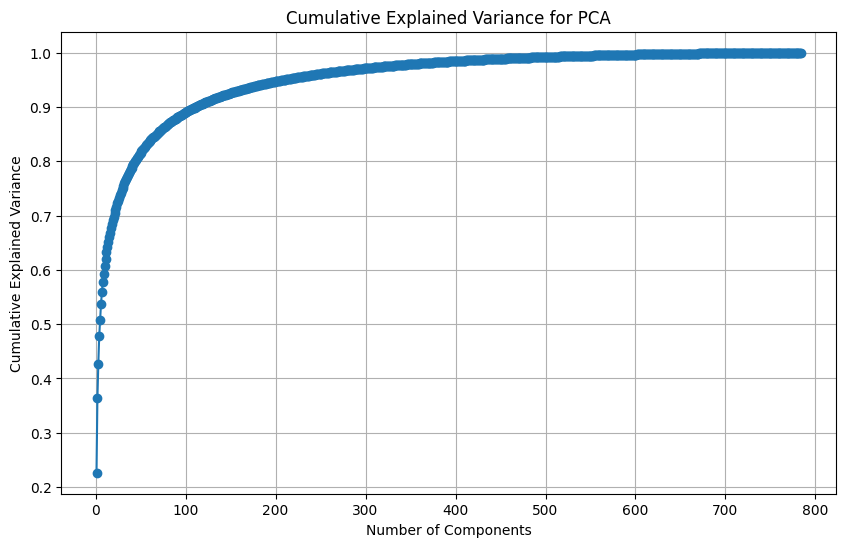

In [30]:
# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train_data)

# Fit PCA and transform the data
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

# Get explained variance and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [31]:
# Take 100 components, because accoring to the graph a 100 explains 90 percent of our data
n_components = 100
pca = PCA(n_components=n_components)
x_pca = pca.fit_transform(x_scaled)

### 4.1. Get explained variance and cumulative explained variance for LDA

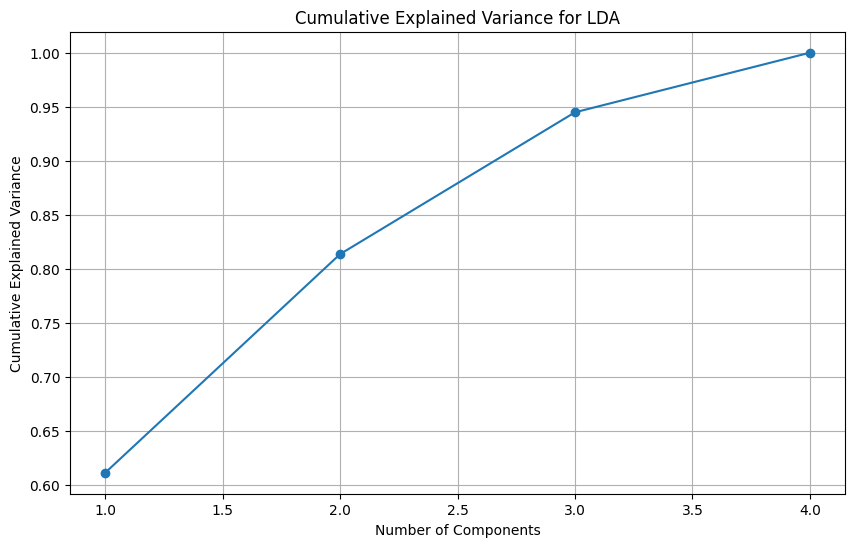

In [32]:
# Fit LDA
lda = LinearDiscriminantAnalysis(n_components=None, solver='eigen')  # Use None to get all components
lda.fit(x_train_data, y_train_data)

# Get explained variance and cumulative explained variance for LDA
explained_variance_ratio_lda = lda.explained_variance_ratio_
cumulative_variance_ratio_lda = np.cumsum(explained_variance_ratio_lda)

# Plot the cumulative explained variance for LDA
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio_lda) + 1), cumulative_variance_ratio_lda, marker='o')
plt.title('Cumulative Explained Variance for LDA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Transform the data using LDA
x_lda = lda.transform(x_train_data)


In [53]:
# just the feautes 
x_train_data
x_test_data
y_train_data
y_test_data

array([1, 0, 3, ..., 4, 0, 2], dtype=uint8)

In [33]:
# PCA with 100 components
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train_data)
x_test_pca = pca.transform(x_test_data)

In [34]:
# LDA with 4 components
lda = LinearDiscriminantAnalysis(n_components=4, solver='eigen')
x_train_lda = lda.fit_transform(x_train_data, y_train_data)
x_test_lda = lda.transform(x_test_data)



## 5. Feed 3 other models with the reduced features 



In [35]:
# imports for  kNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
# imports for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [37]:
# imports for neural networks 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [47]:
#pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.keras (from versions: none)
ERROR: No matching distribution found for tensorflow.keras

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 5.1. kNN

#### 5.1.1. KNN with no PCA and LDA

KNN Validation Accuracy no PCA or LDA: 0.822


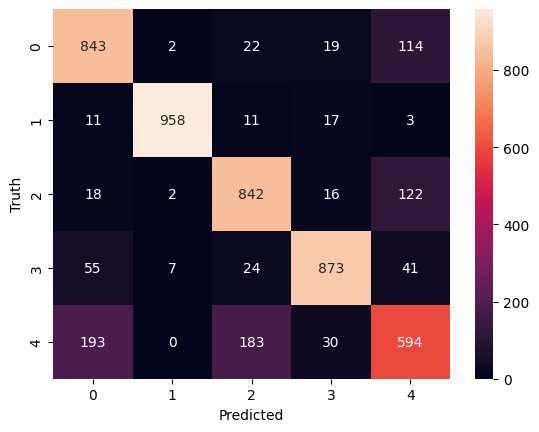

In [39]:
# Create and train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(x_train_data, y_train_data)

# Make predictions on the test data
knn_predictions = knn.predict(x_test_data)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test_data, knn_predictions)
print(f'KNN Validation Accuracy no PCA or LDA: {knn_accuracy}')

# Confusion matrix and heatmap
cm_knn = confusion_matrix(y_test_data, knn_predictions)
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### 5.1.2 PCA KNN

PCA KNN Validation Accuracy: 0.8306


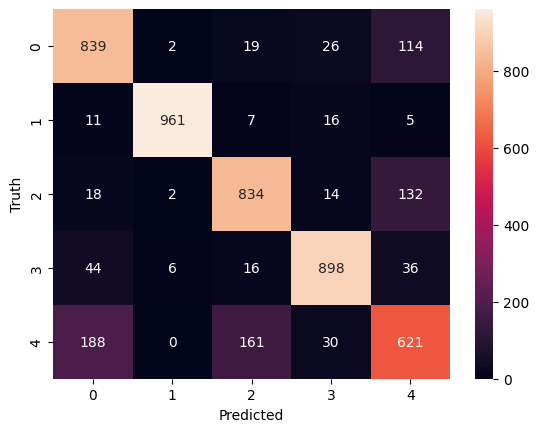

In [40]:
# Create and train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(x_train_pca, y_train_data)

# Make predictions on the test data
knn_predictions = knn.predict(x_test_pca)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test_data, knn_predictions)
print(f'PCA KNN Validation Accuracy: {knn_accuracy}')

# Confusion matrix and heatmap
cm_knn = confusion_matrix(y_test_data, knn_predictions)
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### 5.1.3. KNN LDA

LDA KNN Validation Accuracy: 0.8066


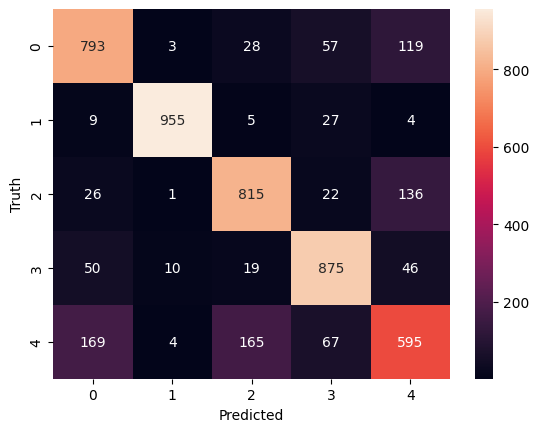

In [41]:
# Create and train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(x_train_lda, y_train_data)

# Make predictions on the test data
knn_predictions = knn.predict(x_test_lda)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test_data, knn_predictions)
print(f'LDA KNN Validation Accuracy: {knn_accuracy}')

# Confusion matrix and heatmap
cm_knn = confusion_matrix(y_test_data, knn_predictions)
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


### 5.2. Decison Trees/ or LDA /or QDA

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

#### 5.2.1. Decision Trees without LDA or PCA

Decision Tree Validation Accuracy no PCA or LDA: 0.764


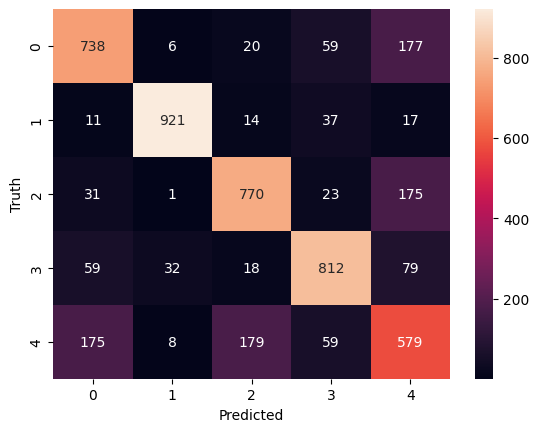

In [43]:
dt = DecisionTreeClassifier()
dt.fit(x_train_data, y_train_data)
dt_predictions = dt.predict(x_test_data)
dt_accuracy = accuracy_score(y_test_data, dt_predictions)
print(f'Decision Tree Validation Accuracy no PCA or LDA: {dt_accuracy}')

cm = confusion_matrix(y_test_data, dt_predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### 5.2.2. Decision Trees with PCA

PCA Decision Tree Validation Accuracy: 0.7416


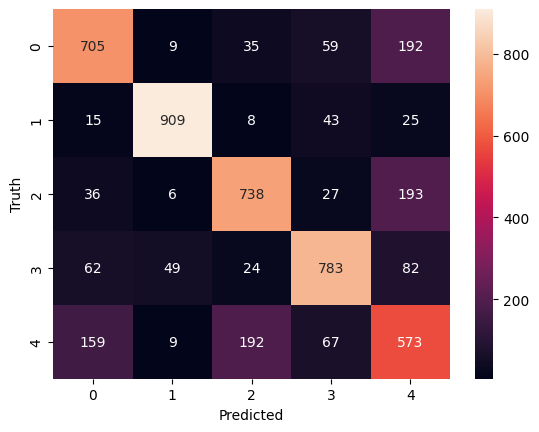

In [44]:
dt = DecisionTreeClassifier()
dt.fit(x_train_pca, y_train_data)
dt_predictions = dt.predict(x_test_pca)
dt_accuracy = accuracy_score(y_test_data, dt_predictions)
print(f'PCA Decision Tree Validation Accuracy: {dt_accuracy}')

cm = confusion_matrix(y_test_data, dt_predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### 5.2.3. Decision Trees with LDA

LDA Decision Tree Validation Accuracy: 0.76


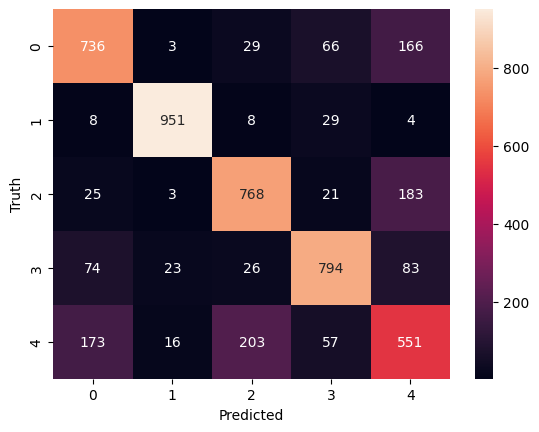

In [45]:
dt = DecisionTreeClassifier()
dt.fit(x_train_lda, y_train_data)
dt_predictions = dt.predict(x_test_lda)
dt_accuracy = accuracy_score(y_test_data, dt_predictions)
print(f'LDA Decision Tree Validation Accuracy: {dt_accuracy}')

cm = confusion_matrix(y_test_data, dt_predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [46]:
#print(x1.shape)
#X1_reshaped = x1.reshape(28,28)
#sns.heatmap(X1_reshaped,fmt='.2f')

#get max value in x1
#max_value = np.max(X1_reshaped)
#print(max_value)

#ax = sns.heatmap(x1.reshape(28,28)[0],annot=True, fmt='float')
#plt.show()


#plt.imshow(x1.reshape(28,28),cmap='hot',interpolation='nearest')
#plt.show()
#print(x1)



### 5.3. Neural Networks 

#### 5.3.1.  Neural Networks NO LDA, NO PCA

In [59]:
# chechking the shape for the input_dim
print(x_train_data.shape)

(10000, 784)


In [60]:
# Defining and compiling the neural network model:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=784))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [61]:
# Training the model
model.fit(x_train_data, y_train_data, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


250/250 [==============================] - 1s 2ms/step - loss: 9.2659 - accuracy: 0.7114 - val_loss: 3.2932 - val_accuracy: 0.7115
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 1.9290 - accuracy: 0.7749 - val_loss: 1.7499 - val_accuracy: 0.7705
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 1.3425 - accuracy: 0.7822 - val_loss: 1.2975 - val_accuracy: 0.7785
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.8696 - accuracy: 0.7966 - val_loss: 0.9920 - val_accuracy: 0.7970
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.7214 - accuracy: 0.8067 - val_loss: 0.8937 - val_accuracy: 0.7745
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.8255 - val_loss: 0.6815 - val_accuracy: 0.8105
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.8360 - val_loss: 0.6304 - val_accuracy: 0.8085
Epoch 8/10
250/25

In [62]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_data, y_test_data)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

157/157 [==============================] - 0s 994us/step - loss: 0.6492 - accuracy: 0.8136
Test Accuracy: 81.36%


#### 5.3.2. Neural Netowks PCA

In [48]:
# Defining and compiling the neural network model:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=100))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [50]:
# Training the model
model.fit(x_train_pca, y_train_data, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


250/250 [==============================] - 1s 2ms/step - loss: 13.6283 - accuracy: 0.7344 - val_loss: 6.3697 - val_accuracy: 0.7920
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 3.8241 - accuracy: 0.8161 - val_loss: 4.4629 - val_accuracy: 0.8040
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 2.0130 - accuracy: 0.8515 - val_loss: 3.7316 - val_accuracy: 0.7910
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 1.2773 - accuracy: 0.8704 - val_loss: 3.1404 - val_accuracy: 0.8135
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.9095 - accuracy: 0.8892 - val_loss: 2.7919 - val_accuracy: 0.8120
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.9038 - val_loss: 2.8472 - val_accuracy: 0.8085
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4668 - accuracy: 0.9193 - val_loss: 2.4460 - val_accuracy: 0.8190
Epo

In [52]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_pca, y_test_data)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


157/157 [==============================] - 0s 916us/step - loss: 2.5710 - accuracy: 0.8074
Test Accuracy: 80.74%


#### 5.3.3. Neural Netwokrs LDA

In [63]:
# chechking the shape for the input_dim
print(x_train_lda.shape)

(10000, 4)


In [65]:
# Defining and compiling the neural network model:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=4))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [66]:
# Training the model
model.fit(x_train_lda, y_train_data, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


250/250 [==============================] - 1s 2ms/step - loss: 0.5297 - accuracy: 0.8474 - val_loss: 0.3556 - val_accuracy: 0.8730
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8741 - val_loss: 0.3487 - val_accuracy: 0.8750
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3450 - accuracy: 0.8761 - val_loss: 0.3469 - val_accuracy: 0.8760
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3429 - accuracy: 0.8765 - val_loss: 0.3496 - val_accuracy: 0.8735
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8764 - val_loss: 0.3595 - val_accuracy: 0.8715
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3418 - accuracy: 0.8730 - val_loss: 0.3413 - val_accuracy: 0.8760
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.8758 - val_loss: 0.3440 - val_accuracy: 0.8795
Epoch 8/10
250/25

In [67]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_lda, y_test_data)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


157/157 [==============================] - 0s 1ms/step - loss: 0.5567 - accuracy: 0.8144
Test Accuracy: 81.44%
